# Assignment 3

Alberto Monaco s1043826
Edoardo Gervasoni s1043824

## Objective of this assignment
The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.


## ** Important: ** When handing in your homework:
+ Hand in the notebook **(and nothing else)** named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ Use the Brightspace discussion board or email the student assistants for questions on how to complete the exercises.
+ If you find mistakes/have suggestions/would like to complain about the assigment material itself, please email me [Lisa] at `l.tostrams@science.ru.nl`


## Advised Reading and Exercise Material
**The following reading material is recommended:**

Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article on ROC curves.


## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
(0.5 pts) Load the wine data set `Data/wine.mat` using the `scipy.io` `loadmat` function. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. Create data matrix $X$, class vector $y$, and the lists $attributeNames$ and $classNames$ with the data provided in the `wine.mat` file. Print out the  $attributeNames$ and $classNames$ to make sure it's a list of strings.

   ** hints: **   
*The object in wine.mat is a dictionary. The attributes are stored in matrix $X$, the class in vector $y$. $y$ is shaped as an array containing single element arrays. To flatten $y$, you can use `y.ravel()`, which unravels matrices into a 1d array. Attribute names and class names are stored in the attributeNames and classNames objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension or for-loops. For more on list comprehension, check https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3. For example, if you have an larger array containing nested arrays of which you want the first element, you can try `new_array = [nested_array[0] for nested_array in larger_array]`.*



### Answer to question 3.1.1

Import libraries and read file

In [1]:
import scipy.io as sio
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = sio.loadmat("Data/wine.mat")
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Mar  8 14:01:55 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 7.4 ,  0.7 ,  0.  , ...,  3.51,  0.56,  9.4 ],
        [ 7.8 ,  0.88,  0.  , ...,  3.2 ,  0.68,  9.8 ],
        [ 7.8 ,  0.76,  0.04, ...,  3.26,  0.65,  9.8 ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
        [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
        [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]]),
 'attributeNames': array([[array(['Fixed acidity'], dtype='<U13'),
         array(['Volatile acidity'], dtype='<U16'),
         array(['Citric acid'], dtype='<U11'),
         array(['Residual sugar'], dtype='<U14'),
         array(['Chlorides'], dtype='<U9'),
         array(['Free sulfur dioxide'], dtype='<U19'),
         array(['Total sulfur dioxide'], dtype='<U20'),
         array(['Density'], dtype='<U7'), array(['pH'], dtype='<U2'),
         array(['Sulphates'], dtype='<U9'),
         array

Create data matrix X and  class vector y

In [2]:
X = data['X']
y = data['y']
y = y.ravel()
print(X,'\n\n',y)

[[ 7.4   0.7   0.   ...  3.51  0.56  9.4 ]
 [ 7.8   0.88  0.   ...  3.2   0.68  9.8 ]
 [ 7.8   0.76  0.04 ...  3.26  0.65  9.8 ]
 ...
 [ 6.5   0.24  0.19 ...  2.99  0.46  9.4 ]
 [ 5.5   0.29  0.3  ...  3.34  0.38 12.8 ]
 [ 6.    0.21  0.38 ...  3.26  0.32 11.8 ]] 

 [0 0 0 ... 1 1 1]


Create attributeNames list and classNames list

In [3]:
attributeNames = [str(x[0]) for x in list(data['attributeNames'].ravel())]
print(type(attributeNames),[type(x) for x in attributeNames],'\n')   #to make sure it's a list of strings

classNames = [str(x[0]) for x in list(data['classNames'].ravel())]
print(type(classNames),[type(x) for x in classNames])   #to make sure it's a list of strings

<class 'list'> [<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>] 

<class 'list'> [<class 'str'>, <class 'str'>]


In [4]:
attributeNames

['Fixed acidity',
 'Volatile acidity',
 'Citric acid',
 'Residual sugar',
 'Chlorides',
 'Free sulfur dioxide',
 'Total sulfur dioxide',
 'Density',
 'pH',
 'Sulphates',
 'Alcohol']

In [5]:
classNames

['Red', 'White']

#### 3.1.2
 (1.5 pts) Fit a decision tree to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` for the stopping criterion. Explain what happens when you change the values of the parameter `min_samples_split`. After fitting the tree, visualize it with the tree_print function in `treeprint.py` in the Toolbox folder. 

** hints: **   
*The `treeprint.py` file contains some documentation on how to use it. Helpfull documentation for the DecisionTreeClassifier function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  



### Answer to question 3.1.2

Define tree_print functions to visualize the tree

In [6]:
import operator
def tree_print(clf, attributeNames, classNames):
    """
    Print the tree of a sklearn DecisionTreeClassifier

    Parameters
    ----------
    clf : sklearn.tree.DecisionTreeClassifier object - A tree that has already been fit.
    attributeNames: vector of names of the variables
    classNames: vector of class names, names for the leafs
    """
    tlevel = _tree_rprint('', clf, attributeNames, classNames)
    print('<',end='')
    for i in range(5*tlevel - 2):
        print('-',end='')
    print('>')
    print('Tree Depth: ',tlevel)

In [7]:
def _tree_rprint(kword, clf, features, labels, node_index=0, tlevel_index=0, parent = 0, left=True):
    # Note: The DecisionTreeClassifier uses the Tree structure defined in:
    # 		github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx
    #       it is an array based tree implementation.
    # indent the nodes according to their tree level
    # LT changes 2017: 
    #     draw tree from left to right
    #     added numbering
    #     added arrows
    # LT changes 2018:
    #     some cleaning
    #     
    #  TODO: 
    #        clean up ugly string formatting code
    #        the following should use the TREE_LEAF constant defined in _tree.pyx
    #        instead of -1, not quite sure how to get at it from the tree user level
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        print(kword[:-4], end=' ' if kword else '')
        # get the majority label
        count_list = clf.tree_.value[node_index, 0]
        max_index, max_value = max(enumerate(count_list), key=operator.itemgetter(1))
        max_label = labels[max_index]
        print(max_label)
        return tlevel_index
    
    else:
        # compute and print node label
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        # recurse down the children
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        #some formatting stuff
        string = kword[:-9]
        if(left_index<11):
            string = kword[:-8]   
        if(left and node_index is not 0):
            leftstr = string[:-1]
            leftstr = leftstr+' '
        else:
            leftstr = string
        tmp = leftstr
        for i in range(tlevel_index+1 - len(string)):
            leftstr = leftstr+' '
        #print left rule
        ltlevel_index = _tree_rprint(leftstr+'  |->{} then'.format(left_index), clf, features, labels, left_index, tlevel_index+1, parent=node_index)
        if(node_index is 0):
            print(' ', end='')
        print(tmp+'  |')
        print(kword, end=' ' if kword else '')
        #print current rule
        print('if {} =< {:4.2f}: go to {}, else go to {}'.format(feature, threshold, left_index, right_index))   
        #more formatting hell
        if(not left):
            rightstr = string[:-1]
            rightstr = rightstr+' '
        else:
            rightstr = string
        tmp = rightstr
        for i in range(tlevel_index+1 - len(string)):
            rightstr = rightstr+' '
        if(node_index is 0):
            print(' ', end='')
        print(tmp+'  |')
        #print right rule
        rtlevel_index = _tree_rprint(rightstr+'  |->{} else'.format(right_index), clf, features, labels, right_index, tlevel_index+1, parent=node_index, left=False)
        # return the maximum depth of either one of the children
        return max(ltlevel_index,rtlevel_index)

Fit a decision tree

In [8]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 100)
clf = clf.fit(X, y)

In [9]:
tree_print(clf, attributeNames, classNames)

         |->3  White
         |
      |->2 then if Sulphates =< 0.56: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.37: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.99: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.10: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.99: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.05: go to 15, else go to 16
   |        |  |        |
   |        |  |        |  |->17  Red
   |        |  |        |  |
   |        |  |        |->16 else if Sulphates =< 0.45:

#### Changing the number of min_samples_split

Low value of min_samples_split

In [10]:
clf2 = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 10)
clf2 = clf2.fit(X, y)
tree_print(clf2, attributeNames, classNames)

            |->4  White
            |
         |->3 then if Volatile acidity =< 0.66: go to 4, else go to 5
         |  |
         |  |->5  Red
         |
      |->2 then if Sulphates =< 0.56: go to 3, else go to 6
      |  |
      |  |     |->8  White
      |  |     |
      |  |  |->7 then if Volatile acidity =< 0.44: go to 8, else go to 9
      |  |  |  |
      |  |  |  |->9  Red
      |  |  |
      |  |->6 else if Chlorides =< 0.04: go to 7, else go to 10
      |     |
      |     |  |->11  White
      |     |  |
      |     |->10 else if Alcohol =< 10.60: go to 11, else go to 12
      |        |
      |        |->12  Red
      |
   |->1 then if Chlorides =< 0.05: go to 2, else go to 13
   |  |
   |  |  |->14  White
   |  |  |
   |  |->13 else if Sulphates =< 0.37: go to 14, else go to 15
   |     |
   |     |  |->16  White
   |     |  |
   |     |->15 else if Density =< 0.99: go to 16, else go to 17
   |        |
   |        |     |->19  White
   |        |     |
   |        |  |->

   |              |  |     |           |  |
   |              |  |     |           |->89 else if Total sulfur dioxide =< 82.50: go to 90, else go to 91
   |              |  |     |              |
   |              |  |     |              |->91  White
   |              |  |     |
   |              |  |  |->44 then if Total sulfur dioxide =< 275.00: go to 45, else go to 92
   |              |  |  |  |
   |              |  |  |  |->92  White
   |              |  |  |
   |              |  |->43 else if Sulphates =< 0.81: go to 44, else go to 93
   |              |     |
   |              |     |     |->95  White
   |              |     |     |
   |              |     |  |->94 then if Residual sugar =< 1.60: go to 95, else go to 96
   |              |     |  |  |
   |              |     |  |  |->96  Red
   |              |     |  |
   |              |     |->93 else if Total sulfur dioxide =< 89.50: go to 94, else go to 97
   |              |        |
   |              |        |  |->98  Wh

High value of min_samples_split

In [11]:
clf2 = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 4000)
clf2 = clf2.fit(X, y)
tree_print(clf2, attributeNames, classNames)

   |->1  Red
   |
if Total sulfur dioxide =< 66.50: go to 1, else go to 2
   |
   |                 |->8  Red
   |                 |
   |              |->7 then if Chlorides =< 0.01: go to 8, else go to 9
   |              |  |
   |              |  |        |->12  White
   |              |  |        |
   |              |  |     |->11 then if Citric acid =< 0.10: go to 12, else go to 13
   |              |  |     |  |
   |              |  |     |  |  |->14  White
   |              |  |     |  |  |
   |              |  |     |  |->13 else if Total sulfur dioxide =< 72.50: go to 14, else go to 15
   |              |  |     |     |
   |              |  |     |     |  |->16  White
   |              |  |     |     |  |
   |              |  |     |     |->15 else if Residual sugar =< 0.92: go to 16, else go to 17
   |              |  |     |        |
   |              |  |     |        |        |->20  White
   |              |  |     |        |        |
   |              |  |     |        |  

*min_samples_split* is the minimum number of samples required to split an internal node within the Decision Tree. We can notice that when *min_samples_split* is very high (e.g. over 4000), the Tree Classifier tends to underfitting, i.e. not learning from the data, as the number of nodes decreases drastically (in the most drastic scenario, we would have only one node); when *min_samples_split* takes low values (e.g. < 20) the Classifier overfits the data, and the number of nodes, as well as the tree depth, will grow.

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2, by applying the `predict()` function from the DecisionTreeClassifier to this sample.  Have another look at the visualized tree. Which attributes are used to classify this wine? 

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

** hints: **
*If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function on how to predict the label for a sample. *

### Answer to question 3.1.3

Position of the corresponding class attribute with the highest probability

In [12]:
clf.predict([[6.9, 1.09,0.06,2.1,0.0061,12,31,0.99,3.5,0.64,12]])

array([1], dtype=uint8)

Class names with the highest probability, given the sample

In [13]:
classNames[clf.predict([[6.9, 1.09,0.06,2.1,0.0061,12,31,0.99,3.5,0.64,12]])[0]]

'White'

Probability of the two classes 

In [14]:
clf.predict_proba([[6.9, 1.09,0.06,2.1,0.0061,12,31,0.99,3.5,0.64,12]])

array([[0.4516129, 0.5483871]])

As we can see from the code above, by applying the function predict on the sample in the table, it returns a 1d array with the position of the corresponding class attribute with the highest probability. So, in this case, we obtain the position 1 (the second in Python) that is related to the class "white", as we expected. 

Taking a look at the tree built in the previous answer (the one with *min_samples_split*=100), we can see that the classifier considers as first attribute *Total sulfure dioxide*, which being <= 66.5, directs the tree to the node *Chlorides*. Being this last one <= 0.05, it addresses the path to the attribute *Sulphates*. In that node, the class attribute will be *white* regardless of its value.
So, the only attributes used to classify this wine are *Total sulfure dioxide* and *Sulphates*.

#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What percentage of the wine data is classified correctly by the tree?



### Answer to question 3.1.4

In [15]:
result = clf.predict(X)  

In [16]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = metrics.confusion_matrix( y, result)
print(cm)

[[1447   70]
 [  13 4774]]


In [17]:
true_percentage = (cm[0,0]+cm[1,1])/len(y)
print(f'Percentage of correct classifications: {true_percentage}')

Percentage of correct classifications: 0.9868337563451777


Let's try to calculate the Accuracy also through an already implemented sklearn function:

In [18]:
print(f'Percentage of correct classifications: {metrics.accuracy_score(y, result)}')

Percentage of correct classifications: 0.9868337563451777


We can see that the percentage of correct classifications (i.e. Accuracy) achived by the Tree Classifier is 0.98 using both methods.

## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) We are again using the wine data set `Data/wine.mat`. Divide the data into a training and a test data set (see hints!). Fit a decision tree to the training data using the Gini (`gdi`) splitting criterion.

Now, we want to find an optimally pruned decision tree by *modifying its maximum depth*. For different values of the parameter `depth` (from 2 to 20), 
+ first fit the decision tree
+ then compute the classification error on the training and test set (this is called holdout cross-validation)

When you've done this for `depth` values 2,...,20, plot the training and test classification error as a function of the tree depth in the same figure. This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. 


** hints: **  
*Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions. The error is 1-accuracy. The easiest way to compute the accuracy is by using the sklearn metrics module: 
 https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?


### Answer to question 3.2.1

As first step we are going to split the dataset between training and test set thorugh train_test_split function.
For the split we will assign 2/3 of the records to the training set and the last 1/3 to the test set.

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state = 3, stratify = y)

Fit the decision tree on the training set taking different size of max_depth.

In [20]:
list_tree = []
for i in range(2,21):
    clf_holdout = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 3).fit(X_train, y_train)
    list_tree.append(clf_holdout)

Performing prediction on the training and test set
(We've decided to split the cells in order to provide clearer code).

In [21]:
train_prediction = []
test_prediction = []
for model in range(0,19):
    pred_train = list_tree[model].predict(X_train)
    train_prediction.append(pred_train)
    
    pred_test = list_tree[model].predict(X_test)
    test_prediction.append(pred_test)

Now we are going to evaluate the models' predictions through accuracy and error on both sets.

In [22]:
from sklearn.metrics import accuracy_score
training_accuracy = []
training_error = []
test_accuracy = []
test_error = []
for model in range(0,19):
    training_accuracy.append(accuracy_score(y_train, train_prediction[model]))
    training_error.append(1 - accuracy_score(y_train, train_prediction[model]))
    test_accuracy.append(accuracy_score(y_test, test_prediction[model]))
    test_error.append(1 - accuracy_score(y_test, test_prediction[model]))
    print(f"Training error: {1 - accuracy_score(y_train, train_prediction[model])}", f"Test error: {1 - accuracy_score(y_test, test_prediction[model])}")

Training error: 0.03575657115794462 Test error: 0.03748197981739543
Training error: 0.02202225905754207 Test error: 0.022585295530994753
Training error: 0.011839924224484988 Test error: 0.014416146083613635
Training error: 0.008761543926118831 Test error: 0.011532916866890952
Training error: 0.004735969689793951 Test error: 0.00961076405574246
Training error: 0.003788775751835227 Test error: 0.008169149447381119
Training error: 0.0030783802983660458 Test error: 0.0100913022585295
Training error: 0.0023679848448969754 Test error: 0.01057184046131665
Training error: 0.0021311863604073222 Test error: 0.011052378664103801
Training error: 0.0014207909069381408 Test error: 0.00913022585295531
Training error: 0.0011839924224484877 Test error: 0.011532916866890952
Training error: 0.0009471939379588346 Test error: 0.00961076405574246
Training error: 0.0007103954534690704 Test error: 0.012013455069677992
Training error: 0.0004735969689794173 Test error: 0.012493993272465143
Training error: 0.000

From the data above, we can see how errors of the model in training set decrease with increasing of the tree depth.
Regarding of the test set, instead, we don't have a linear relationship (Tree depth and errors are not directly proportional).

Plotting the training and test classification error as a function of the tree depth in the same figure

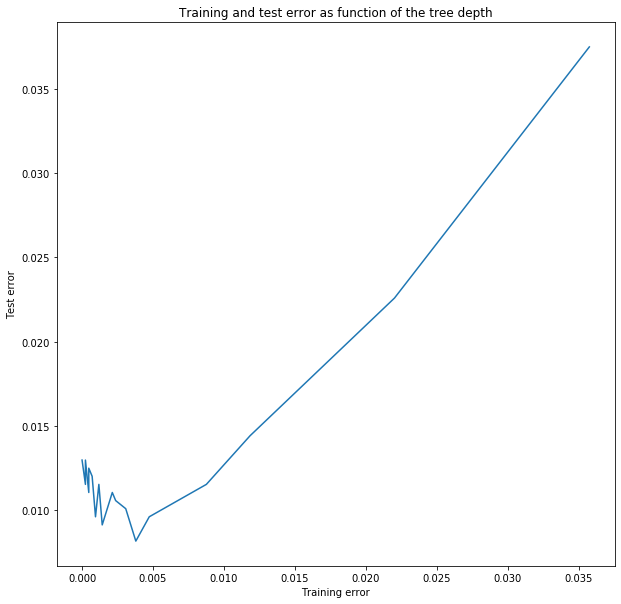

Figure 1: Training set error on the X-axis and test set error on the Y-axis


In [23]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

ax.plot(training_error,test_error)
ax.set_xlabel('Training error')
ax.set_ylabel('Test error')
ax.set_title("Training and test error as function of the tree depth")
plt.show()
print('Figure 1: Training set error on the X-axis and test set error on the Y-axis')

The plot above shows the presence of a minimum.
Since most of the times, an error too low on the training set means overfitting and then wrong prediction on the test set, we need to consider as optimal value of tree depth, the one which gives us the lowest error on the test set.
As a matter of fact, it tells us that despite the error on the training set is not the lowest in that point (even though is very low), it provides the best accuracy value on the test set, that is the gist in this case.

To get knowledge of the real value of the tree depth that corresponds to the minimum of the graph above, we can build up a bar plot with tree depth on the x-axis.

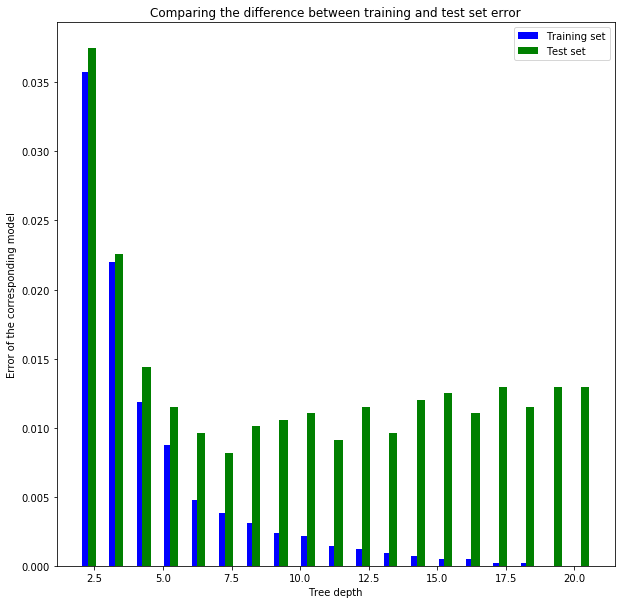

Figure 2: Barplot showing training set error and test set error as function of tree depth


In [24]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(np.arange(2,21)+0.2, training_error, width=0.3, color='b', label = 'Training set')
ax.bar(np.arange(2,21)+0.4, test_error, width=0.3, color='g', label = 'Test set')
ax.set_xlabel('Tree depth')
ax.set_ylabel('Error of the corresponding model')
ax.legend()
ax.set_title("Comparing the difference between training and test set error")
plt.show()
print('Figure 2: Barplot showing training set error and test set error as function of tree depth')

The minimum of the test set error is reached with a tree depth equal to 7, as shown by the figure above. On the same level we achieve a very low value of training errors as well. We will consider this value of tree depth as the optimal one indeed.

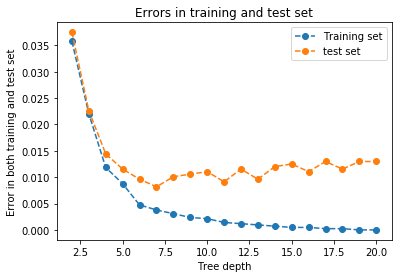

Figure 3: Errors obtained in training and test set as function of tree depth


In [25]:
plt.plot(np.arange(2,21),training_error ,'--o',label = 'Training set')
plt.plot(np.arange(2,21),test_error , '--o',label = 'test set')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Error in both training and test set')
plt.title('Errors in training and test set')
plt.show()
print('Figure 3: Errors obtained in training and test set as function of tree depth')

As confirmed by the last graph, we can take 7 as the optimal tree depth value.

#### Changing the random split between training and test set. (To do it, we will change the random state, which was equal to 3 for the first experiment). 

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state = 0, stratify = y)

In [27]:
list_tree = []
for i in range(2,21):
    clf_holdout = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 3).fit(X_train, y_train)
    list_tree.append(clf_holdout)

In [28]:
train_prediction = []
test_prediction = []
for model in range(0,19):
    pred_train = list_tree[model].predict(X_train)
    train_prediction.append(pred_train)
    
    pred_test = list_tree[model].predict(X_test)
    test_prediction.append(pred_test)

In [29]:
training_accuracy = []
training_error = []
test_accuracy = []
test_error = []
for model in range(0,19):
    training_accuracy.append(accuracy_score(y_train, train_prediction[model]))
    training_error.append(1 - accuracy_score(y_train, train_prediction[model]))
    test_accuracy.append(accuracy_score(y_test, test_prediction[model]))
    test_error.append(1 - accuracy_score(y_test, test_prediction[model]))

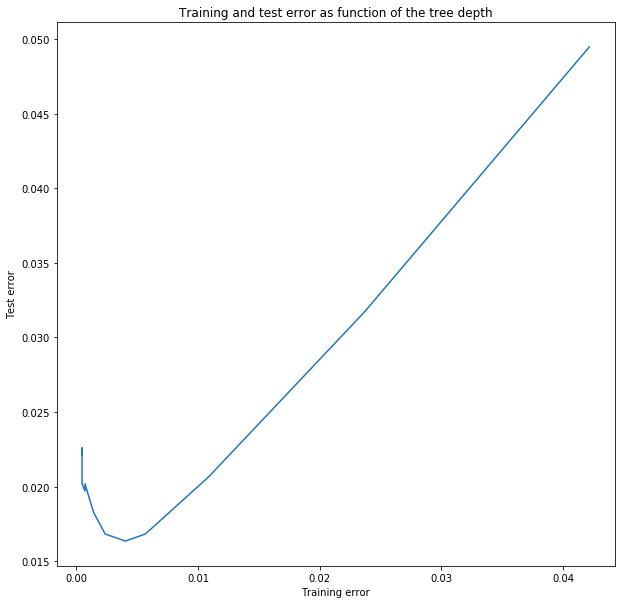

Figure 4: Training set error on the X-axis and test set error on the Y-axis (changing random state)


In [30]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

ax.plot(training_error,test_error)
ax.set_xlabel('Training error')
ax.set_ylabel('Test error')
ax.set_title("Training and test error as function of the tree depth")
plt.show()
print('Figure 4: Training set error on the X-axis and test set error on the Y-axis (changing random state)')

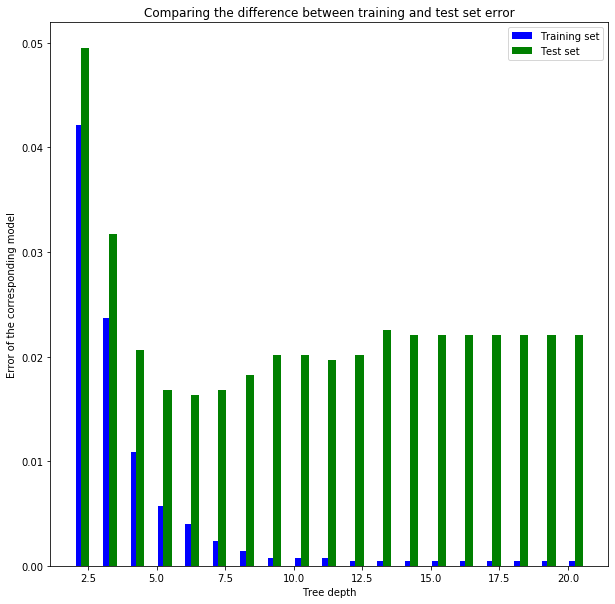

Figure 5: Barplot showing training set error and test set error as function of tree depth (changing random state)


In [31]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(np.arange(2,21)+0.2, training_error, width=0.3, color='b', label = 'Training set')
ax.bar(np.arange(2,21)+0.4, test_error, width=0.3, color='g', label = 'Test set')
ax.set_xlabel('Tree depth')
ax.set_ylabel('Error of the corresponding model')
ax.legend()
ax.set_title("Comparing the difference between training and test set error")
plt.show()
print('Figure 5: Barplot showing training set error and test set error as function of tree depth (changing random state)')

As we can see from the accuracy and error values, both in training and test set, changing the random split leads to different results, even though they don't give considerable changes. In fact, the model, if trained on a different sample, will lead to different predictions on the test set.
The difference can be observed by the two plots above. There is still a minimum, but it is related to another tree depth that, with this random state, is equal to 6.

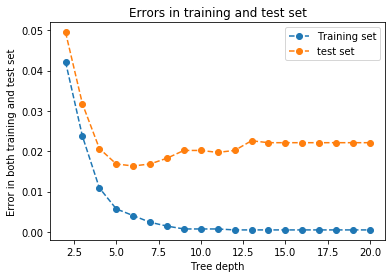

Figure 6: Errors obtained in training and test set as function of tree depth (changing random state)


In [32]:
plt.plot(np.arange(2,21),training_error ,'--o',label = 'Training set')
plt.plot(np.arange(2,21),test_error , '--o',label = 'test set')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Error in both training and test set')
plt.title('Errors in training and test set')
plt.show()
print('Figure 6: Errors obtained in training and test set as function of tree depth (changing random state)')

The graph above confirms the thesis explained before.

#### 3.2.2
(1.5 pts) Repeat the exercise above, using 10-fold cross-validation. K-fold cross-validation works by splitting X into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/


For each fold, fit a decision tree on the training set and evaluate its performance on the test set. Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

** hints: **
*This time the `KFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`*

*If you are creating a for loop iterating over an object where you both need the index and the elements of the object, you can enumerate the object. For example:*

`
for index, (element) in enumerate(object):
    array[index] = operation(element)
`
 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?


### Answer to question 3.2.2

We are going to use the function KFold in order to split training and test set through the method known as K Fold cross validation. On each fold we will fit the Decision Tree for 19 differents size of depth (from 2 and 20).
Done the predictions on the 10 different tests set, for each depth we will store the sum of the error computed on each fold. At the end, the sum obtained will be divided by the total number of fold (10 in this case), in order to compute the average error for each depth, in both training and test set.

In [33]:
from sklearn.model_selection import KFold
k = 10
kf = KFold(n_splits=k, random_state=3)
error_train = np.zeros(19)
error_test = np.zeros(19) 

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    for i in range(2,21):
        clf_cross = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 3).fit(X_train, y_train)
        accuracy_train = accuracy_score(y_train, clf_cross.predict(X_train))
        error_train[i-2] += 1 - accuracy_train
        accuracy_test = accuracy_score(y_test, clf_cross.predict(X_test))
        error_test[i-2] += 1 - accuracy_test
error_train/=k  
error_test/=k
print(f"Vector of the average training error per depth: {error_train}")
print(f"Vector of the average test error per depth: {error_test}")

Vector of the average training error per depth: [0.04087344 0.0224371  0.01295465 0.00934141 0.00710303 0.00556962
 0.00444158 0.00347219 0.00285529 0.00220316 0.00163915 0.00121614
 0.00086365 0.00074027 0.00052876 0.00044063 0.00040538 0.00035251
 0.00028201]
Vector of the average test error per depth: [0.08053631 0.04518301 0.02901039 0.02647549 0.02679219 0.0229882
 0.02346313 0.02441627 0.02298971 0.02314869 0.02330717 0.02235529
 0.02378387 0.02346615 0.02330767 0.02378412 0.02299047 0.02489472
 0.02425955]


Now we are going to plot the average of errors achieved on the training set against the ones obtained on the test set, as function of the tree depth.

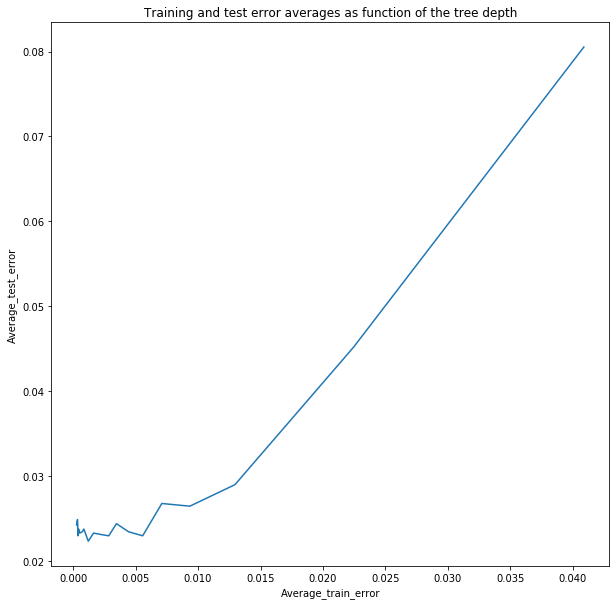

Figure 7: Plot of the average errors for depth, in both training and test sets


In [34]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

ax.plot(error_train,error_test)
ax.set_xlabel('Average_train_error')
ax.set_ylabel('Average_test_error')
ax.set_title("Training and test error averages as function of the tree depth")
plt.show()
print('Figure 7: Plot of the average errors for depth, in both training and test sets')

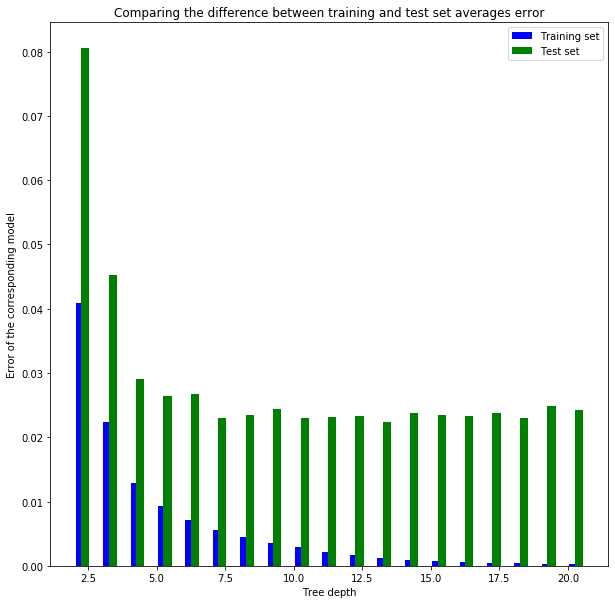

Figure 8: Barplot showing training set and test sets average errors as function of tree depth


In [35]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(np.arange(2,21)+0.2, error_train, width=0.3, color='b', label = 'Training set')
ax.bar(np.arange(2,21)+0.4, error_test, width=0.3, color='g', label = 'Test set')
ax.set_xlabel('Tree depth')
ax.set_ylabel('Error of the corresponding model')
ax.legend()
ax.set_title("Comparing the difference between training and test set averages error")
plt.show()
print('Figure 8: Barplot showing training set and test sets average errors as function of tree depth')

For the same reason explained at the point 3.2.1. We could consider as optimal value a tree depth equal to 7. After that point we don't reach a lower value of test error (except for 13), and moreover we don't want to make our model more complicated if it doesn't mean a clear improvement about results.

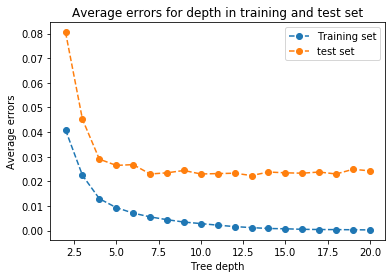

Figure 9: Average errors obtained in training and test set as function of tree depth (changing random state)


In [36]:
plt.plot(np.arange(2,21),error_train ,'--o',label = 'Training set')
plt.plot(np.arange(2,21),error_test , '--o',label = 'test set')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Average errors')
plt.title('Average errors for depth in training and test set')
plt.show()
print('Figure 9: Average errors obtained in training and test set as function of tree depth (changing random state)')

In this case as well, the line plot allows us to see clearly what we have stated for the visualizations above.

As we have observed at the point 3.2.1, the results will change if we modify the random state of the training and test set.
The differences are negligible though. The gist is still achieve low values in both training and test set, maintaining a good level of simplicity for the model.


And below, what we get if we decide to perform a 100 Fold Cross Validation:

In [37]:
from sklearn.model_selection import KFold
k = 100
kf = KFold(n_splits=k, random_state=3)
error_train = np.zeros(19)
error_test = np.zeros(19) 

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    for i in range(2,21):
        clf_cross = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 3).fit(X_train, y_train)
        accuracy_train = accuracy_score(y_train, clf_cross.predict(X_train))
        error_train[i-2] += 1 - accuracy_train
        accuracy_test = accuracy_score(y_test, clf_cross.predict(X_test))
        error_test[i-2] += 1 - accuracy_test
error_train/=k  
error_test/=k
print(f"Vector of the average training error per depth: {error_train}")
print(f"Vector of the average test error per depth: {error_test}")

Vector of the average training error per depth: [0.04469985 0.02600561 0.01282655 0.01026284 0.00717037 0.00641408
 0.00536296 0.00412276 0.00319021 0.0024195  0.00182664 0.00123539
 0.00090371 0.00078353 0.00067458 0.0004823  0.00047108 0.00045987
 0.00041019]
Vector of the average test error per depth: [0.04489831 0.0328249  0.02233631 0.01900298 0.01727183 0.01790427
 0.01742808 0.0187004  0.01933036 0.01901786 0.0187004  0.01902282
 0.01886161 0.0199752  0.01949901 0.01902282 0.01918155 0.0199752
 0.01949653]


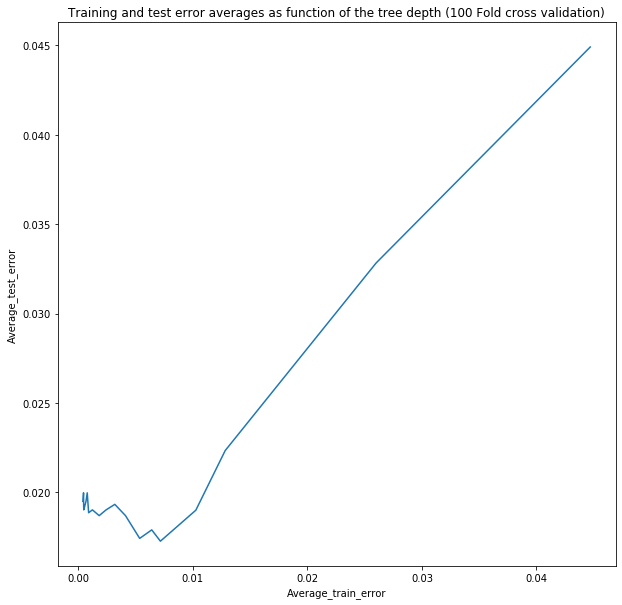

Figure 10: Plot of the average errors, training on the X-axis and test on the Y-axis as function of depth


In [38]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

ax.plot(error_train,error_test)
ax.set_xlabel('Average_train_error')
ax.set_ylabel('Average_test_error')
ax.set_title("Training and test error averages as function of the tree depth (100 Fold cross validation)")
plt.show()
print('Figure 10: Plot of the average errors, training on the X-axis and test on the Y-axis as function of depth')

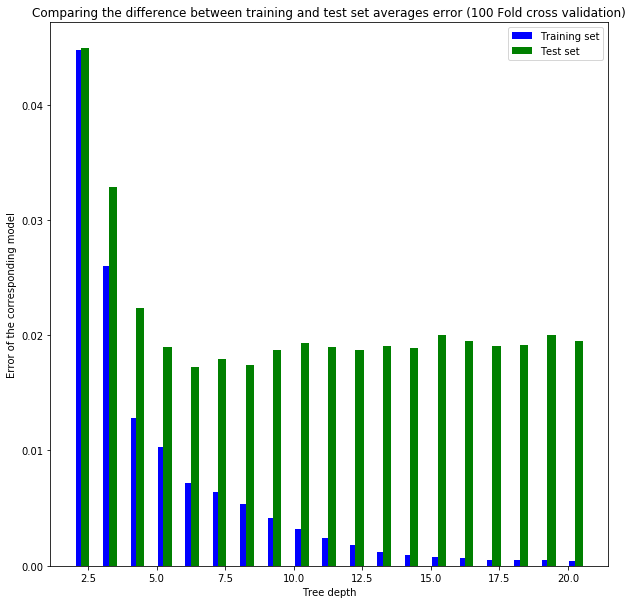

Figure 11: Barplot showing training set and test sets average errors as function of tree depth (100 Fold cross validation)


In [39]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.bar(np.arange(2,21)+0.2, error_train, width=0.3, color='b', label = 'Training set')
ax.bar(np.arange(2,21)+0.4, error_test, width=0.3, color='g', label = 'Test set')
ax.set_xlabel('Tree depth')
ax.set_ylabel('Error of the corresponding model')
ax.legend()
ax.set_title("Comparing the difference between training and test set averages error (100 Fold cross validation)")
plt.show()
print('Figure 11: Barplot showing training set and test sets average errors as function of tree depth (100 Fold cross validation)')

In this case as well the results will be slightly different. Performing a cross validation with 100 fold, allows us to pick a tree depth equal to 6 as the optimal value. Therefore the model will be easier.

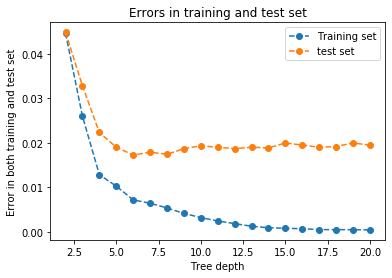

Figure 12: Errors obtained in training and test set as function of tree depth (100 Fold cross validation)


In [40]:
plt.plot(np.arange(2,21),error_train ,'--o',label = 'Training set')
plt.plot(np.arange(2,21),error_test , '--o',label = 'test set')
plt.legend()
plt.xlabel('Tree depth')
plt.ylabel('Error in both training and test set')
plt.title('Errors in training and test set')
plt.show()
print('Figure 12: Errors obtained in training and test set as function of tree depth (100 Fold cross validation)')

Finally we confirm the value 6 as the optimal one for the tree depth.

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    

#### 3.3.1
(0.25 pts) To make sure you understand how ROC works, make an ROC curve and calculate the AUC (on paper) with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`
    
What's the AUC you calculated? Do you think this classifier works well?


### Answer to question 3.3.1

In our case both $i$ and $j$ go from 1 to 5. Taking this into account and applying the formula above, the AUC calculated on paper is equal to $\frac{21}{25} = 0.84$.

This result is also confirmed by pre-implemented functions from sklearn package as we can see below:

In [41]:
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]

fpr, tpr, thresholds = metrics.roc_curve(labels, classifier_probs)
metrics.auc(fpr, tpr)

0.8400000000000001

Since the perfect classifier would have AUC = 1 and the random predictor has AUC = 0.5, we think that a classifier with AUC = 0.84 works well.

#### 3.3.2
  Load the file `Data/classprobs.xls` using the Pandas `read_excel` function. Inspect the data and cast it to an array with the `.values` attribute. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0).


### Answer to question 3.3.2

In [42]:
import pandas as pd

data2 = pd.read_excel("Data//classprobs.xls",header=None)
data2.head()

,0,1,2
0,1,0.88700,0.797060
1,0,0.13591,0.099401
2,0,0.55549,0.650750
3,0,0.23876,0.508570
4,0,0.14542,0.236290


In [43]:
data2 = data2.values
print(type(data2),'\n',data2)

<class 'numpy.ndarray'> 
 [[1.       0.887    0.79706 ]
 [0.       0.13591  0.099401]
 [0.       0.55549  0.65075 ]
 [0.       0.23876  0.50857 ]
 [0.       0.14542  0.23629 ]
 [1.       0.81876  0.48949 ]
 [0.       0.50594  0.038203]
 [1.       0.93954  0.23982 ]
 [1.       0.22339  0.62287 ]
 [0.       0.31219  0.57823 ]
 [0.       0.19486  0.61664 ]
 [1.       0.61471  0.5013  ]
 [1.       0.63854  0.75183 ]
 [0.       0.29924  0.33768 ]
 [0.       0.16546  0.44035 ]
 [1.       0.72124  0.44813 ]
 [0.       0.1088   0.37254 ]
 [1.       0.48676  0.25349 ]
 [1.       0.94156  0.64531 ]
 [0.       0.2968   0.53258 ]
 [0.       0.24267  0.26251 ]
 [0.       0.17043  0.44888 ]
 [0.       0.015464 0.5467  ]
 [1.       0.30852  0.32406 ]
 [0.       0.11212  0.28476 ]
 [0.       0.29639  0.41658 ]
 [1.       0.97275  0.79959 ]
 [1.       0.58501  0.30657 ]
 [0.       0.12244  0.43778 ]
 [1.       0.87557  0.75815 ]
 [1.       0.76142  0.32031 ]
 [0.       0.14132  0.22986 ]
 [1.       0.8

#### 3.3.3
(1 pts) Calculate the ROC curves for both of the classifiers by calculating the FP and TP rates and plot them in the same plot. Make the plot yourself as opposed to using a library! Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the FP and TP rates. You can then plot them using the `matplotlib.pyplot` `plot` function. Check the documentation on how to plot a dashed line. Remember to include a legend!* 

**An extra tip: the sign test example below includes a figure with dashed lines and a legend...**
 

### Answer to question 3.3.3

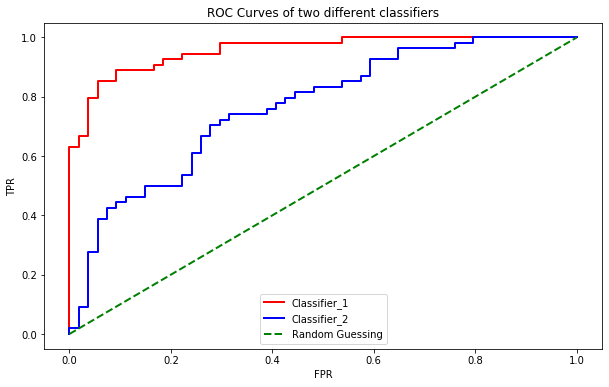

Figure 13: ROC Curves of two different classifiers compared with the one of a Random Classifier. On the Y axis there is the True Positive Rate; on the X axis there is the False Positive Rate


In [44]:
import matplotlib.pyplot as plt
fpr1, tpr1, thresholds1 = metrics.roc_curve(data2[:,0], data2[:,1])
fpr2, tpr2, thresholds2 = metrics.roc_curve(data2[:,0], data2[:,2])

fig = plt.figure(figsize=(10,6))
plt.plot(fpr1,tpr1, '-',label='Classifier_1',linewidth=2,color='r')
plt.plot(fpr2,tpr2, '-',label='Classifier_2',linewidth=2,color='b')
plt.plot([0, 1], [0, 1],'--',label='Random Guessing',linewidth=2,color='g')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower center')
plt.title('ROC Curves of two different classifiers')
plt.show()
print('Figure 13: ROC Curves of two different classifiers compared with the one of a Random Classifier.\
 On the Y axis there is the True Positive Rate; on the X axis there is the False Positive Rate')

From the graph we can see that both classifiers perform better than random guessing. In fact, looking at the same percentage of observations identified as False Positive, the two models are able to classify higher percentages of True Positive than the Random one, which is completely casual. Moreover we can see that the first classifier performs better than the second one, since it manages to achieve higher TP rates than the second for the same percentage of FP.

#### 3.3.4
(0.5 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. **Write your own code for this calculation.** Do the AUC scores indicate that the classifiers are performing better than this baseline?




 

### Answer to question 3.3.4

Calculating number of observations with 1 and 0 class value:

In [45]:
n = len(data2[:,0][data2[:,0]==1])    # n=54
m = len(data2[:,0][data2[:,0]==0])    # m=54

Defining a function to calculate AUC:

In [46]:
def auc(n,m,p_i,p_j):
    
    summ = 0
    for i in range(0,n):
        for j in range(0,m):
            if p_i[i] > p_j[j]:
                summ+=1
    return summ/(m*n)

Calculating AUC for the two classifiers

In [47]:
# Defining p_i and p_j for both classifiers
p_i1 = data2[:,1][data2[:,0]==1]    
p_j1 = data2[:,1][data2[:,0]==0]   
p_i2 = data2[:,2][data2[:,0]==1]  
p_j2 = data2[:,2][data2[:,0]==0]

print(f'AUC of Classifier_1: {auc(n,m,p_i1,p_j1)}\n\nAUC of Classifier_2: {auc(n,m,p_i2,p_j2)}')

AUC of Classifier_1: 0.9564471879286695

AUC of Classifier_2: 0.7654320987654321


AUC calculations confirm what we've already concluded in the previous question looking at the ROC Curves: the two classifiers perform better than the baseline. In fact the first one (the best) achives an AUC of 0.95, while the second one an AUC of 0.76, which are in both cases higher values than the random model, whose AUC is 0.5.


#### 3.3.5
(0.25 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers.

** hint: **

*Take a look at https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html *

### Answer to question 3.3.5

So, we will use list comprehension with 0.5 as a threshold to consider if a classifier has assigned  1 or 0 to an observation.

In [48]:
first_predictions = [1 if i > 0.5 else 0 for i in data2[:,1]]
second_predictions = [1 if i > 0.5 else 0 for i in data2[:,2]]

In [49]:
print(f'Accuracy of Classifier_1: {metrics.accuracy_score(data2[:,0], first_predictions)}\
    \n\nAccuracy of Classifier_2: {metrics.accuracy_score(data2[:,0], second_predictions)}')

Accuracy of Classifier_1: 0.8611111111111112    

Accuracy of Classifier_2: 0.6944444444444444


#### 3.3.6
(1 pts) Create the 2x2 table (or array, or list, or dataframe..) of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.**


** hints: **  
*As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).*

### Answer to question 3.3.6

Create the 2x2 table of wrong and correct classifications by the first and the second classifier

In [50]:
CorrectWrongMatrix = np.matrix([[0,0],[0,0]])

for i in range(0,len(data2)):    
    if first_predictions[i] == second_predictions[i] == data2[i,0]:      # M1 = M2 = True
        CorrectWrongMatrix[0,0] += 1
    if first_predictions[i] == second_predictions[i] != data2[i,0]:      # M1 != M2 != True
        CorrectWrongMatrix[1,1] += 1
    if first_predictions[i] == data2[i,0] != second_predictions[i]:      # M1 = True != M2
        CorrectWrongMatrix[0,1] += 1
    if second_predictions[i] == data2[i,0] != first_predictions[i]:      # M2 = True != M1
        CorrectWrongMatrix[1,0] += 1
        
print(CorrectWrongMatrix)

[[67 26]
 [ 8  7]]


Our Null Hypothesis $H_0$ is that the performances of our two classifiers are not significantly different at a significance level of 0.05, i.e. both models have a probability of 50% of wrongly classifying an observation while the other is correct.

In [51]:
from scipy.stats import binom

# N = observations for which the two classifiers give different predictions
N = CorrectWrongMatrix[0,1]+CorrectWrongMatrix[1,0]

# According to the null hypothesis, both models have a probability of 50% of wrongly classifying an observation while 
# the other is correct.
b = binom(N,0.5)    

p_value = b.cdf(min(CorrectWrongMatrix[0,1],CorrectWrongMatrix[1,0])) + (1-b.cdf(max(CorrectWrongMatrix[0,1],CorrectWrongMatrix[1,0])-1))
print('The p-value is {:.3f}'.format(p_value))

The p-value is 0.003


The p-value that we have obtained is way lower than the threshold of 0.05. Then we can reject the null hypothesis $H_0$: the performances of the two models are statistically different at a significance level of 0.05. In particular, as we've already seen from AUC, ROC curves and Accuracy, the first classifier performs better than the second one.

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero_hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of his random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you place 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [52]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])

print('----------lucky | random \n',*['bet {:<5}  | {} | {}\n'.format(t[0],t[1],t[2]) for t in zip(range(0,len(lucky_coin)),lucky_coin,random_coin)],'-----\n')

----------lucky | random 
 bet 0      | 1 | 0
 bet 1      | 1 | 1
 bet 2      | 1 | 0
 bet 3      | 0 | 1
 bet 4      | 1 | 0
 bet 5      | 1 | 1
 bet 6      | 1 | 0
 bet 7      | 1 | 0
 bet 8      | 1 | 0
 bet 9      | 0 | 1
 bet 10     | 1 | 0
 bet 11     | 1 | 1
 bet 12     | 1 | 0
 bet 13     | 1 | 1
 bet 14     | 0 | 1
 bet 15     | 1 | 1
 bet 16     | 1 | 1
 bet 17     | 0 | 0
 bet 18     | 1 | 0
 bet 19     | 1 | 0
 bet 20     | 1 | 0
 bet 21     | 0 | 0
 bet 22     | 1 | 0
 -----



Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [53]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

The lucky coin won 12 times, while the random won 3 times.


You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero_hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this, assuming that *zero_hypothesis* is right:

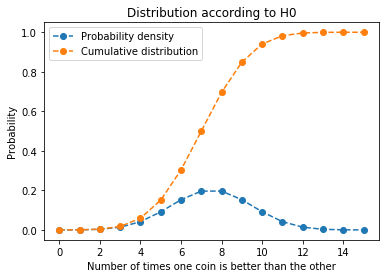

In [54]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better, which is 0.5 according to your H0
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero_hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [55]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

The p-value is 0.035


So your observations are very unlikely if *zero_hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.